# PROJECT TITANIC - MACHINE LEARNING FROM DISASTER 
![caption](image.jpg)

# Loading Data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df = pd.read_csv('train.csv', index_col='PassengerId')

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df = pd.read_csv('test.csv', index_col='PassengerId')

In [10]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [15]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


# Exploratory Data Analysis (EDA)

In [18]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [19]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [20]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

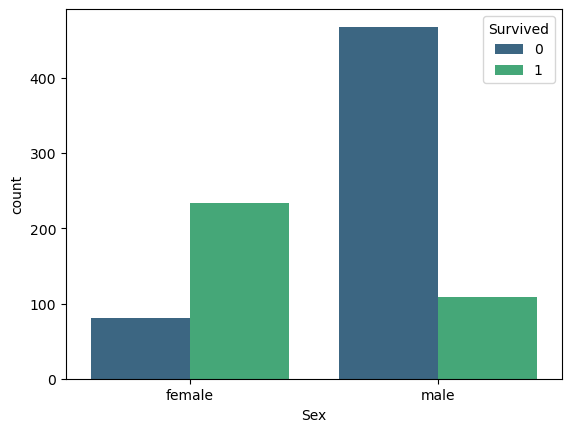

In [21]:
sns.countplot(data = train_df, x = 'Sex', palette='viridis', hue = 'Survived')

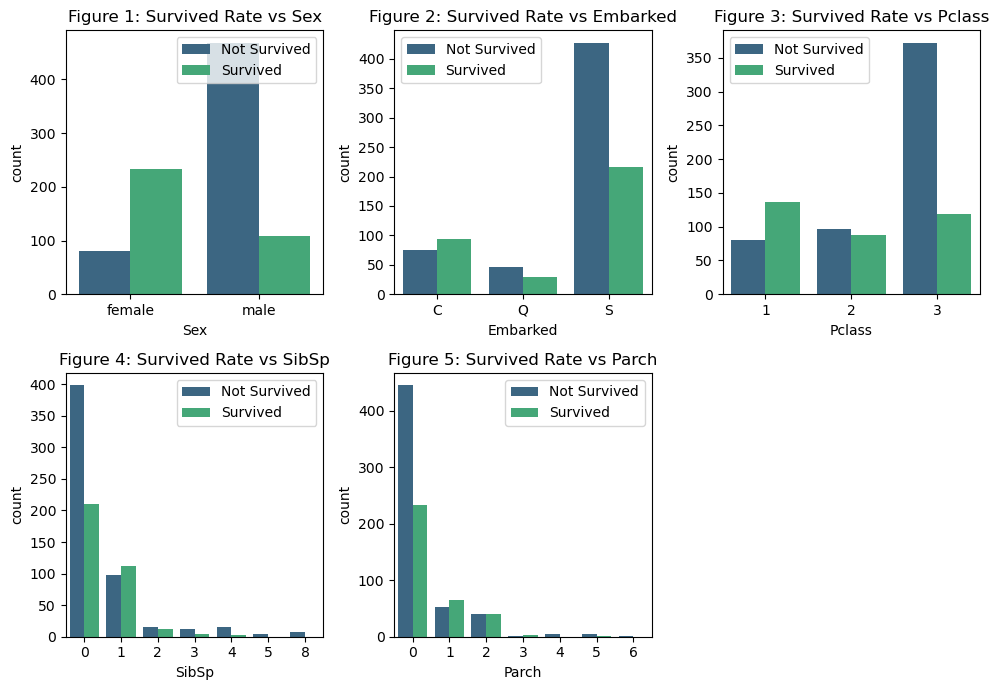

In [22]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows,n_cols, figsize=(10,7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette= 'viridis', ax = ax_i )
            ax_i.set_title(f"Figure {i+1}: Survived Rate vs {cols[i]}")
            ax_i.legend(title='', labels={'Not Survived','Survived'})
ax.flat[-1].set_visible(False)
plt.tight_layout()

## EDA for Numerical Features

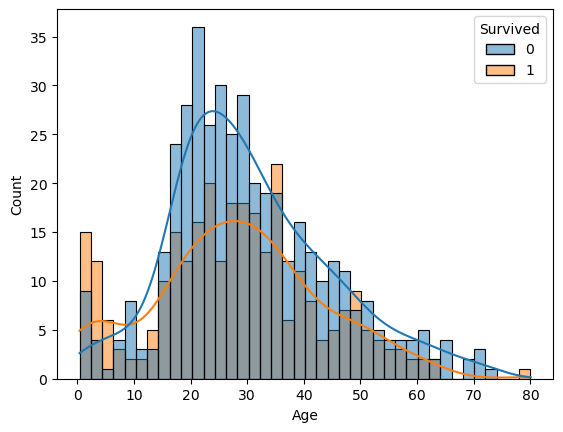

In [23]:
sns.histplot(data = train_df, x = 'Age', bins = 40, kde= True, hue= 'Survived');

In [24]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

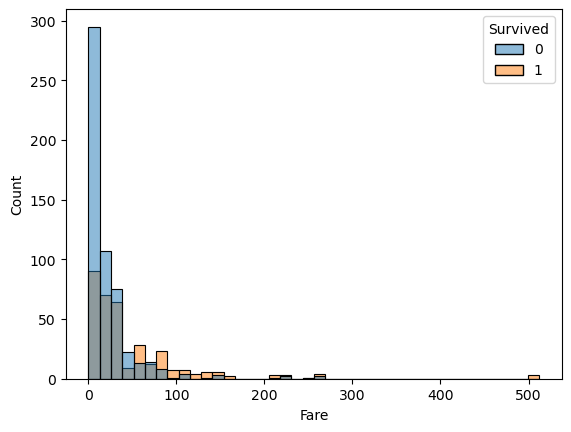

In [25]:
sns.histplot(data = train_df, x = 'Fare', bins = 40, hue= 'Survived');

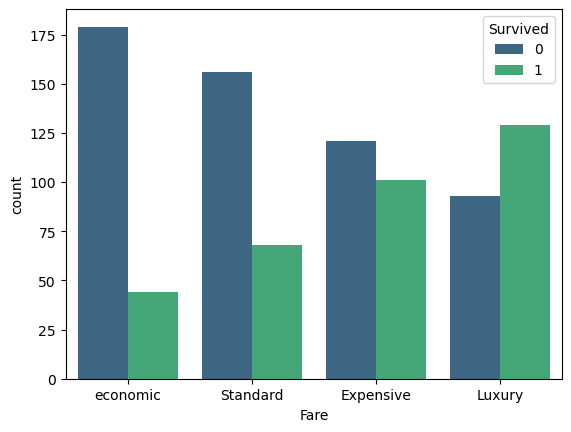

In [26]:
# Chia thanh 4 khoang 0-25%, 25-50,50-75,75-100
Fare_category = ['economic', 'Standard', 'Expensive', 'Luxury']
quar_data = pd.qcut(train_df['Fare'],4, labels = Fare_category)

sns.countplot(data = train_df, x = quar_data, hue= 'Survived', palette='viridis' );

# Feature Engineering and Data Wrangling

In [27]:
# name
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [28]:
# Regular Expression
import re
def extract_title(name):
    k = re.compile(r",([\w\s]+)\.")
    #if k.search(name) is None:
        #print(name)
    return k.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [29]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [30]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4,NaN,C,Mrs


In [31]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [32]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [33]:
def gr_title(title):
    if title in ['Mr', 'Miss','Mrs', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'others'


train_df['Title']=train_df['Title'].apply(lambda title: gr_title(title))
test_df['Title']=test_df['Title'].apply(lambda title: gr_title(title))

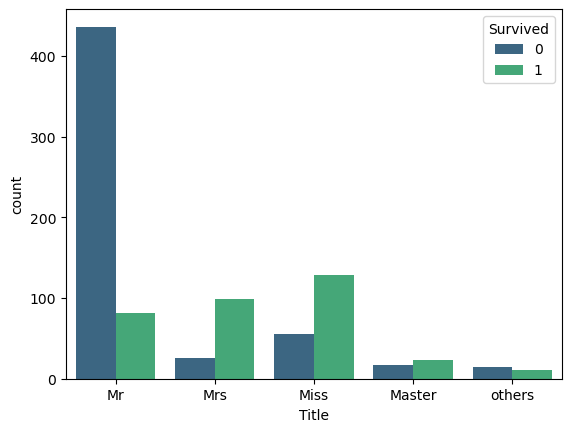

In [34]:
sns.countplot(data = train_df, x= 'Title', hue='Survived', palette='viridis');

In [35]:
train_df['Famaly_S'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [36]:
test_df['Famaly_S'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [37]:
train_df['Famaly_Cat'] = pd.cut(train_df['Famaly_S'], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large'])
test_df['Famaly_Cat'] = pd.cut(test_df['Famaly_S'], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large'])

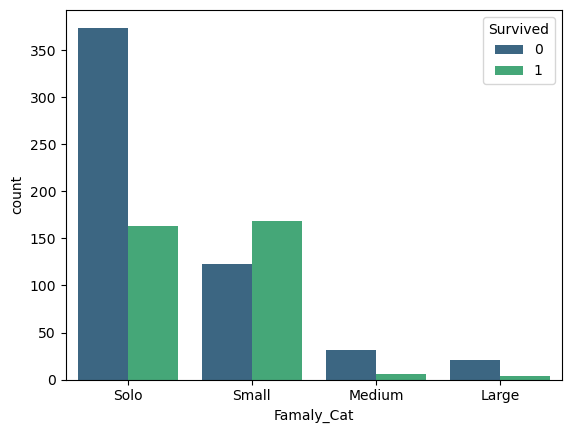

In [38]:
sns.countplot(data = train_df, x= 'Famaly_Cat', hue='Survived', palette='viridis');

## Data Wrangling

In [39]:
num_feature = ['Age', 'Fare']
cat_feature = ['Sex', 'Pclass', 'Embarked', 'Title', 'Famaly_Cat']
feature_cols = num_feature + cat_feature
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Famaly_Cat']


In [40]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print(f'{col} has {missing_count*100/n_rows:.2f} %missing values.. ')
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87 %missing values.. 
Embarked has 0.22 %missing values.. 
Age has 20.57 %missing values.. 
Fare has 0.24 %missing values.. 


### Filling missing values

In [41]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].median()

In [42]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [43]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform(lambda x: x.fillna(x.median()))

In [44]:
test_df['Age'] =test_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform(lambda x: x.fillna(x.median()))

In [45]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.22 %missing values.. 
Fare has 0.24 %missing values.. 


In [46]:
X = train_df[feature_cols]
y = train_df['Survived']
X_test = test_df[feature_cols]

In [47]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_transform = Pipeline(steps=[
    ( 'imputer', SimpleImputer(strategy='median')),
    ( 'scaler', StandardScaler())
])
cat_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [48]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transform, num_feature),
    ('cat', cat_transform,cat_feature)
])

In [49]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Famaly_Cat'])])

In [50]:
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

# Model Tranning

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2025)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures

In [54]:
log_reg = LogisticRegression(solver ='liblinear', max_iter =1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [55]:
log_reg.score(X_valid, y_valid)

0.8044692737430168

In [56]:
y_pred = log_reg.predict(X_valid)

In [57]:
precision_score(y_valid,y_pred), recall_score(y_valid, y_pred)

(0.8333333333333334, 0.6666666666666666)

In [58]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       104
           1       0.83      0.67      0.74        75

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [59]:
poly = PolynomialFeatures(degree=4)
poly_feature_X_train = poly.fit_transform(X_train)
poly_feature_X_valid = poly.transform(X_valid)

In [60]:
poly_log_reg = LogisticRegression(solver ='liblinear', max_iter =1000)
poly_log_reg.fit(poly_feature_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [61]:
poly_log_reg.score(poly_feature_X_valid, y_valid)

0.8100558659217877

In [62]:
dc_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 5, random_state=2025)
dc_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2025)

In [63]:
dc_tree.score(X_valid,y_valid)

0.8044692737430168

## Cross_Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth= 5, random_state=2025)

lr_score = cross_val_score(log_reg_cv,X,y, scoring='accuracy', cv = 10)

In [66]:
lr_score.mean(), lr_score.std()

(0.8294257178526842, 0.03425623444974377)

In [67]:
dt_score = cross_val_score(dt_cv, X,y, scoring='accuracy',cv=10)
dt_score

array([0.72222222, 0.86516854, 0.74157303, 0.85393258, 0.87640449,
       0.80898876, 0.82022472, 0.78651685, 0.85393258, 0.80898876])

In [68]:
dt_score.mean(), dt_score.std()

(0.8137952559300874, 0.04920819552141339)

## Baseline Model Comparision

In [110]:
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
seed = 2025
models = [
    LinearSVC(max_iter=12000,random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p =2),
    LogisticRegression(solver='liblinear', max_iter= 1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm='SAMME'),
    XGBClassifier(random_state=seed, eval_metric ='logloss')
]

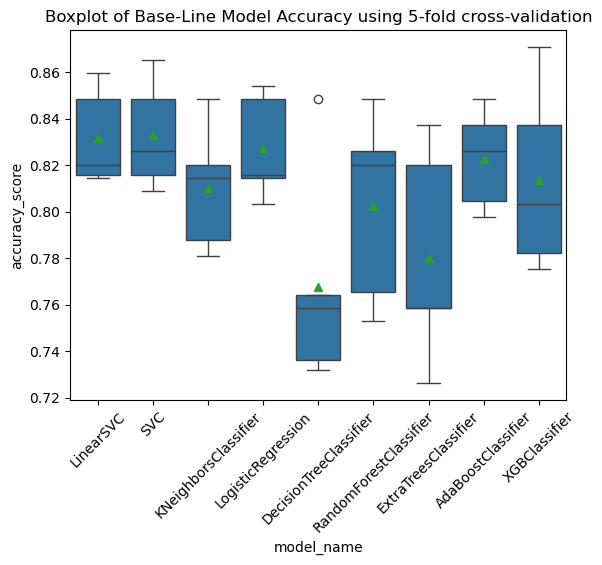

,model_name,fold_id,accuracy_score
0,LinearSVC,0,0.815642
1,LinearSVC,1,0.848315
2,LinearSVC,2,0.859551
3,LinearSVC,3,0.820225
4,LinearSVC,4,0.814607
5,SVC,0,0.815642
6,SVC,1,0.848315
7,SVC,2,0.865169
8,SVC,3,0.825843
9,SVC,4,0.808989


In [117]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    if plot_results:
        sns.boxplot(x = 'model_name', y= 'accuracy_score', data =cv_df, showmeans = True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation = 45)
        plt.show()
       
    return cv_df

generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=True)


In [133]:
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
            
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean,std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    baseline_results.sort_values(by = ['Mean'], ascending=False, inplace=True)
    return baseline_results
            
generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.832791,0.023442
LinearSVC,0.831668,0.020817
LogisticRegression,0.827173,0.022475
AdaBoostClassifier,0.822692,0.021374
XGBClassifier,0.813728,0.039954
KNeighborsClassifier,0.810351,0.027097
RandomForestClassifier,0.802511,0.041250
ExtraTreesClassifier,0.782336,0.048540
DecisionTreeClassifier,0.767717,0.047147


In [167]:
svc = SVC(random_state=seed)
svc.fit(X_train, y_train)
y_pres_test = svc.predict(X_test) 

In [168]:
svc.score(X_valid,y_valid)

0.8044692737430168

In [212]:
y_pres_test_df = pd.DataFrame(y_pres_test,columns=['Survived'])

In [215]:
y_pres_test_df.insert(0, 'PassengerId', range(1, len(y_pres_test_df) + 1))

In [217]:
y_pres_test_df.to_csv("y_sub.csv", index=False, encoding='utf-8')

In [218]:
y_pres_test_df

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
413,414,0
414,415,1
415,416,0
416,417,0
